### How has spending on specific ASU job descriptions changed over time?

In [151]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns

# read each CSV file into dataframe
FY2012 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2012.csv") 
FY2013 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2013.csv") 
FY2014 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2014.csv") 
FY2015 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2015.csv") 
FY2016 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2016.csv") 
FY2017 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2017.csv") 
FY2018 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2018.csv") 

# simple way of combining the CSV file dataframes into one
# similar to Union operator in SQL
asu_dept_data_long = pd.concat([FY2012,\
                           FY2013,\
                           FY2014,\
                           FY2015,\
                           FY2016,\
                           FY2017,\
                           FY2018])

asu_dept_data_long.drop('Unnamed: 6', axis=1, inplace=True)

# remove characters that prevent numbers from being converted to type int
asu_dept_data_long['Salary'] = asu_dept_data_long['Salary'].str.replace('$','')
asu_dept_data_long['Salary'] = asu_dept_data_long['Salary'].str.replace(',','')

asu_dept_data_long['Salary'] = asu_dept_data_long['Salary'].apply(lambda x: int(float(x)))

In [106]:
asu_dept_data_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71453 entries, 0 to 11773
Data columns (total 6 columns):
Calendar Year             71453 non-null int64
Full Name                 71453 non-null object
Job Description           71453 non-null object
Department Description    71453 non-null object
Salary                    71453 non-null int64
FTE                       71453 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.8+ MB


In [102]:
#remove unnecessary column on the right stating where the data came from
asu_dept_data_long.head()

Calendar Year             Full Name             Job Description  \
0           2012      Aarestad,Barbara                 Coordinator   
1           2012           Abbas,James             Assoc Professor   
2           2012  Abbaszadegan,Morteza                   Professor   
3           2012            Abbe,Scott  Tech Support Analyst Coord   
4           2012           Abbey,Craig                    Director   

           Department Description  Salary  FTE  
0              Career Preparation   41000  1.0  
1  Sch Biological & Hlth Sys Engr   96936  1.0  
2  Sch Sustain Engr & Built Envrn  125413  1.0  
3  Engineering Technical Services   78838  1.0  
4           EVPP Consultant Group   52000  0.5

In [104]:
#verify all years are included
asu_dept_data_long.groupby('Calendar Year')['Calendar Year'].count()

Calendar Year
2012     8778
2013     9172
2014     9677
2015    10321
2016    10709
2017    11022
2018    11774
Name: Calendar Year, dtype: int64

### All positions graphed cumulatively over time

Text(0, 0.5, 'Spending (Millions)')

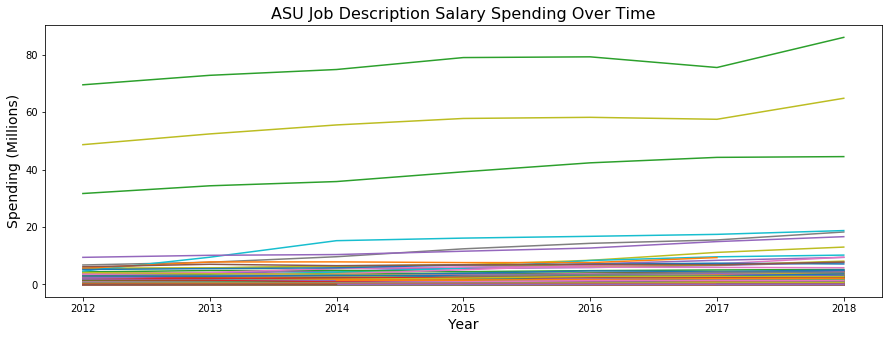

In [122]:
asu_job_group = asu_dept_data_long.groupby(['Calendar Year', 'Job Description'])['Salary'].sum().unstack()
asu_job_group = asu_job_group/1000000

fig, ax = plt.subplots(figsize=(15,5))
asu_job_group.plot(ax=ax)
ax.get_legend().remove()

plt.title("ASU Job Description Salary Spending Over Time",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Spending (Millions)",fontsize=14)

### But what if I want to focus on just the top 5 positions by spending?

In [139]:
top_jobs = asu_dept_data_long.groupby(['Job Description'])['Salary'] \
    .sum() \
    .sort_values(ascending=False) \
    .to_frame() \
    .head(5)

top_jobs

Salary
Job Description           
Professor        536715186
Assoc Professor  394755003
Asst Professor   272045629
Instructor        98447120
Lecturer          85796192

In [162]:
top_jobs_subset = pd.merge(top_jobs.index.to_frame(), asu_dept_data_long, on='Job Description')
top_jobs_subset.shape

(15454, 6)

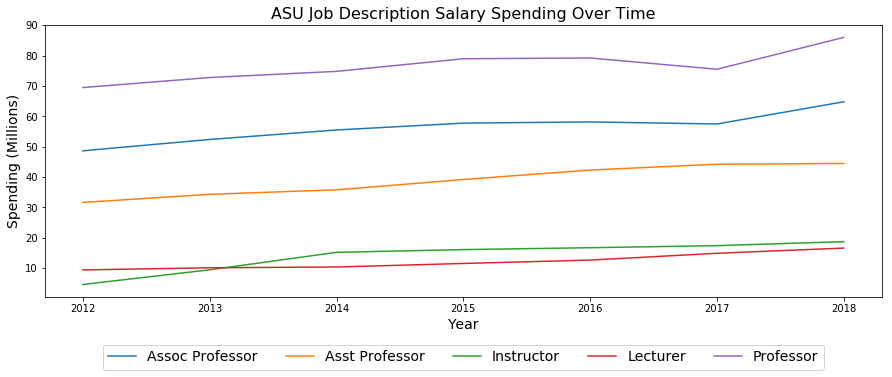

In [160]:
asu_job_group = top_jobs_subset.groupby(['Calendar Year', 'Job Description'])['Salary'].sum().unstack()
asu_job_group = asu_job_group/1000000

fig, ax = plt.subplots(figsize=(15,5))
asu_job_group.plot(ax=ax)

plt.title("ASU Job Description Salary Spending Over Time",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Spending (Millions)",fontsize=14)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5,fontsize=14)

# great resource for how to adjust the legend outside of the chart
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot